In [3]:
import os
import cv2

os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.9"
os.environ["TF_GPU_ALLOCATOR"]="cuda_malloc_async"
os.environ["MLIR_CRASH_REPRODUCER_DIRECTORY"]="./crash"

import tensorflow as tf
print(tf.config.list_physical_devices())
tf.test.is_built_with_cuda()






[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


True

['Tile 4', 'Tile 5', 'Tile 2', 'Tile 6', 'Tile 8', 'Tile 7', 'Tile 3', 'Tile 1']

 Image /home/chinatip/Desktop/image_segmentation/dataset_original/Tile 4/images/image_part_004.jpg
<class 'numpy.ndarray'>
1000 => 1000/1000
 Image /home/chinatip/Desktop/image_segmentation/dataset_original/Tile 4/images/image_part_002.jpg
<class 'numpy.ndarray'>
2000 => 1000/1000
 Image /home/chinatip/Desktop/image_segmentation/dataset_original/Tile 4/images/image_part_001.jpg
<class 'numpy.ndarray'>
3000 => 1000/1000
 Image /home/chinatip/Desktop/image_segmentation/dataset_original/Tile 4/images/image_part_008.jpg
<class 'numpy.ndarray'>
4000 => 1000/1000
 Image /home/chinatip/Desktop/image_segmentation/dataset_original/Tile 4/images/image_part_007.jpg
<class 'numpy.ndarray'>
5000 => 1000/1000
 Image /home/chinatip/Desktop/image_segmentation/dataset_original/Tile 4/images/image_part_006.jpg
<class 'numpy.ndarray'>
6000 => 1000/1000
 Image /home/chinatip/Desktop/image_segmentation/dataset_original/Tile 4

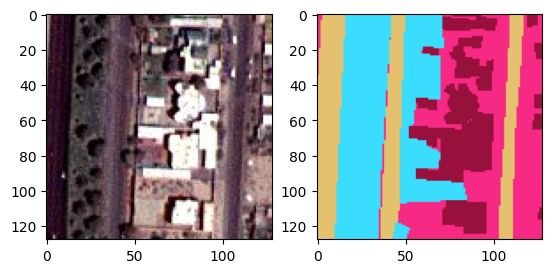

In [63]:
from random import randint
import matplotlib.pyplot as plt
import os
from PIL import Image



size=128

folders=os.listdir('dataset_original')
folders=[i for i in folders if not '.' in i]
print(folders)
f_cnt=0
im_save_path=os.getcwd()+'/dataset/images/'
msk_save_path=os.getcwd()+'/dataset/masks/'
for i in folders:
    b_path=os.getcwd()+'/dataset_original/'+i
    im_fol_path=b_path+'/images'
    msk_fol_path=b_path+'/masks'
    im_items=os.listdir(im_fol_path)
    im_items=[im.split('.')[0] for im in im_items]
    for j in im_items:
        im_path=im_fol_path+'/'+j+'.jpg'
        msk_path=msk_fol_path+'/'+j+'.png'
        # print(im_path,msk_path)
        im=cv2.imread(im_path)
        msk=cv2.imread(msk_path)
        

        x_dim,y_dim,_=im.shape
        x_lim=x_dim-size-1
        y_lim=y_dim-size-1
        print(f"\n Image {im_path}")
        # print(im.shape,x_lim,y_lim)
        for k in range(1000):
            x=randint(0,x_lim)
            y=randint(0,y_lim)
            tmp_im=im[x:x+size,y:y+size,:]
            tmp_msk=msk[x:x+size,y:y+size,:]
            if k == 20:
                print(type(tmp_im))
                plt.subplot(1,2,1).imshow(tmp_im)
                plt.subplot(1,2,2).imshow(tmp_msk)
            tmp_im=Image.fromarray(tmp_im)
            tmp_msk=Image.fromarray(tmp_msk)
            tmp_im.save(im_save_path+f'im_{f_cnt:06}.png')
            tmp_msk.save(msk_save_path+f'msk_{f_cnt:06}.png')
            f_cnt=f_cnt+1
            print(f"{f_cnt} => {k+1}/{1000}\r",end='')
            
